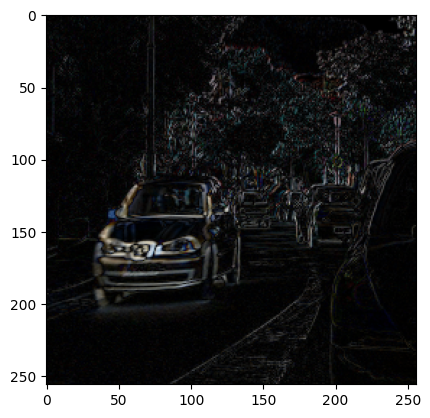

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

I = cv2.imread("cm1.png")
J = cv2.imread("cm2.png")
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
diff = cv2.absdiff(I,J)
plt.imshow(diff)
plt.show()
I = I_gray
J = J_gray

In [2]:
def block_OF(I,J, W2 = 3, dX = 3, dY = 3):
    u = np.zeros(I.shape).astype(np.float32)
    v = np.zeros(I.shape).astype(np.float32)
    for j in range(W2+dX, I.shape[0]-W2-dX):
        for i in range(W2+dY, I.shape[1]-W2-dY):
            minimum = np.inf
            vect = [0,0]
            IO = I[j-W2:j+W2+1,i-W2:i+W2+1].astype(np.float32)
            for k in range(-dX,dX+1):
                for l in range(-dY,dY+1):
                    JO = J[j-W2+k:j+W2+1+k,i-W2+l:i+W2+1+l].astype(np.float32)
                    d = np.sqrt(np.sum((np.square(JO-IO))))
                    if(d<minimum):
                        vect = [k,l]
                        minimum = d
            u[j, i] = vect[0]
            v[j, i] = vect[1]
    return u,v

def u_v_to_angular_rgb(u,v):
    mag,angle = cv2.cartToPolar(v,u)
    H = (angle*90/np.pi).astype('uint8')
    H = H.reshape(list(H.shape)+[1])
    S = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    S = S.reshape(list(S.shape)+[1])
    V = (np.ones(u.shape)*255).astype('uint8')
    V = V.reshape(list(V.shape)+[1])
    img = np.concatenate([H,S,V],axis=2)
    img_rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img_rgb


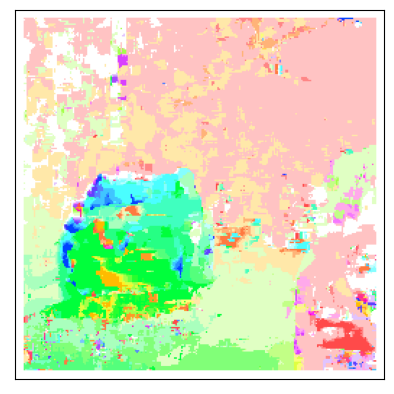

In [3]:
u,v = block_OF(I,J, W2 = 3, dX = 3, dY = 3)
img_rgb = u_v_to_angular_rgb(u,v)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

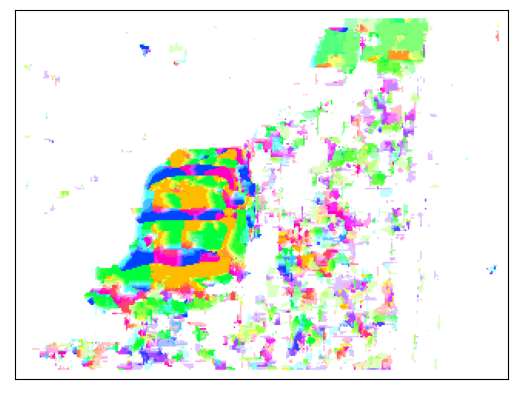

In [4]:
I = cv2.imread("I.jpg")
J = cv2.imread("J.jpg")
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
diff = cv2.absdiff(I,J)
I = I_gray
J = J_gray

u,v = block_OF(I,J, W2 = 3, dX = 3, dY = 3)
img_rgb = u_v_to_angular_rgb(u,v)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

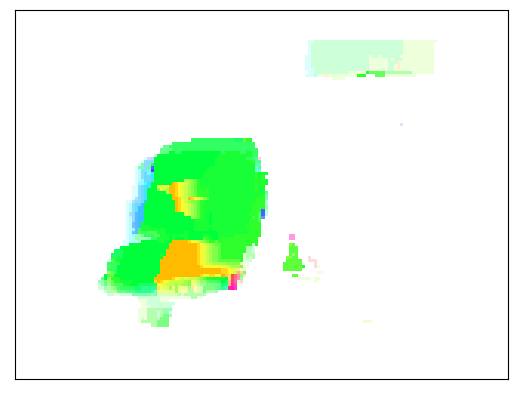

In [5]:

I = cv2.imread("I.jpg")
J = cv2.imread("J.jpg")
I = cv2.resize(I, [int(I.shape[1]/2),int(I.shape[0]/2)])
J = cv2.resize(J, [int(J.shape[1]/2),int(J.shape[0]/2)])
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
diff = cv2.absdiff(I,J)
I = I_gray
J = J_gray

u,v = block_OF(I,J, W2 = 5, dX = 5, dY = 5)
img_rgb = u_v_to_angular_rgb(u,v)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

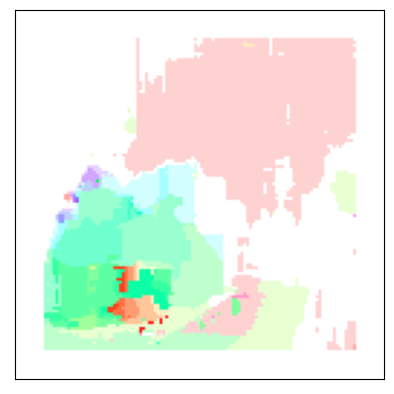

In [6]:
I = cv2.imread("cm1.png")
J = cv2.imread("cm2.png")
I = cv2.resize(I, [int(I.shape[1]/2),int(I.shape[0]/2)])
J = cv2.resize(J, [int(J.shape[1]/2),int(J.shape[0]/2)])
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
diff = cv2.absdiff(I,J)
I = I_gray
J = J_gray

u,v = block_OF(I,J, W2 = 5, dX = 5, dY = 5)
img_rgb = u_v_to_angular_rgb(u,v)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

Zadanie 2


In [12]:
def of(I, J, W2=3, dY=3, dX=3):
    u = np.zeros(I.shape).astype(np.float32)
    v = np.zeros(I.shape).astype(np.float32)
    for j in range(W2+dX, I.shape[0]-W2-dX):
        for i in range(W2+dY, I.shape[1]-W2-dY):
            minimum = np.inf
            vect = [0,0]
            IO = I[j-W2:j+W2+1,i-W2:i+W2+1].astype(np.float32)
            for k in range(-dX,dX+1):
                for l in range(-dY,dY+1):
                    JO = J[j-W2+k:j+W2+1+k,i-W2+l:i+W2+1+l].astype(np.float32)
                    d = np.sqrt(np.sum((np.square(JO-IO))))
                    if(d<minimum):
                        vect = [k,l]
                        minimum = d
            u[j, i] = vect[0]
            v[j, i] = vect[1]
    return u,v

def vis_flow(u, v, YX, name):
    mag,angle = cv2.cartToPolar(v,u)
    H = (angle*90/np.pi).astype('uint8')
    H = H.reshape(list(H.shape)+[1])
    S = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    S = S.reshape(list(S.shape)+[1])
    V = (np.ones(I.shape)*255).astype('uint8')
    V = V.reshape(list(V.shape)+[1])
    img = np.concatenate([H,S,V],axis=2)
    img_rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img_rgb

def pyramid (im , max_scale ):
    images =[ im ]
    for k in range (1 , max_scale ):
        images . append ( cv2 . resize ( images [k -1] , (0 ,0) , fx =0.5 , fy =0.5) )
    return images

def OF_wielo(I, J, W2=3, dY=3, dX=3, deep = 3):
    im_I = pyramid(I, 3)
    im_J = pyramid(J, 3)
    I = im_I[-1]
    U = np.zeros(im_I[-1].shape)
    V = np.zeros(im_I[-1].shape)
    for i in range(deep):
        u,v = of(I, im_J[deep-i-1], W2=3, dY=3, dX=3)
        I_new = I.copy()
        for x in range(I_new.shape[0]):
            for y in range(I_new.shape[1]):
                I_new[x + int(u[x,y]), y + int(v[x,y])] = I[x,y]
        U = U+u
        V = V+v
        if(i != deep -1):
            I = cv2.resize(I_new, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
            U = cv2.resize(U, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)*2
            V = cv2.resize(V, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)*2
        plt.gray()
        plt.imshow(I_new)
        plt.xticks([])
        plt.yticks([])
        plt.show()

        plt.gray()
        plt.imshow(u_v_to_angular_rgb(u,v))
        plt.xticks([])
        plt.yticks([])
        plt.show()
    return U,V



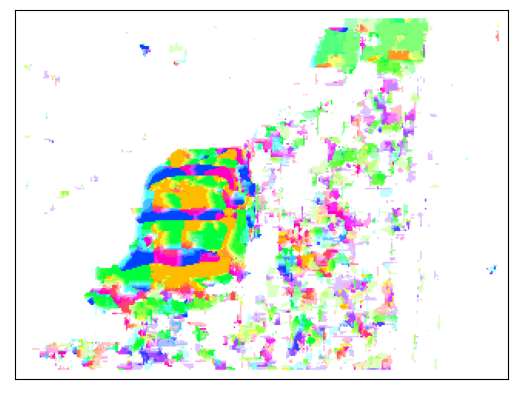

In [8]:
I = cv2.imread("I.jpg")
J = cv2.imread("J.jpg")
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
diff = cv2.absdiff(I,J)
I = I_gray
J = J_gray

u,v = of(I,J, W2 = 3, dX = 3, dY = 3)
img_rgb = vis_flow(u,v, u.shape, 'mmm')
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

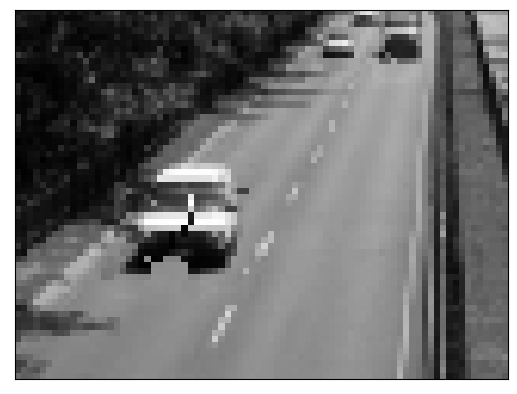

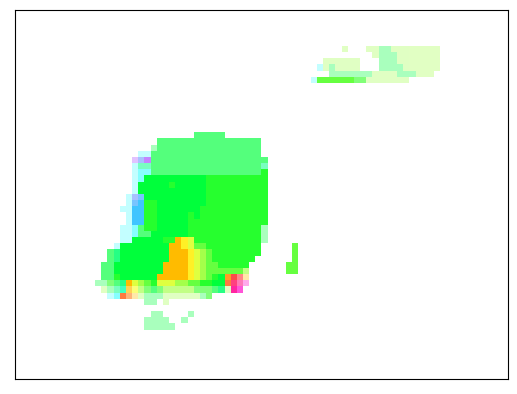

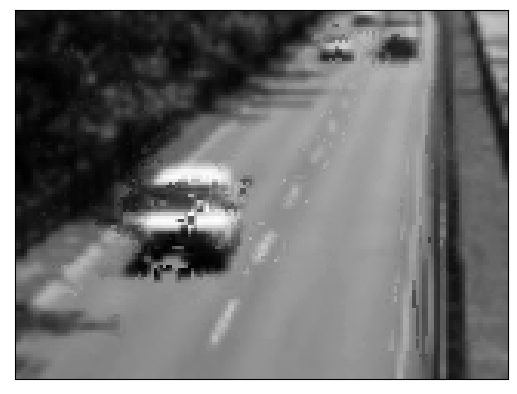

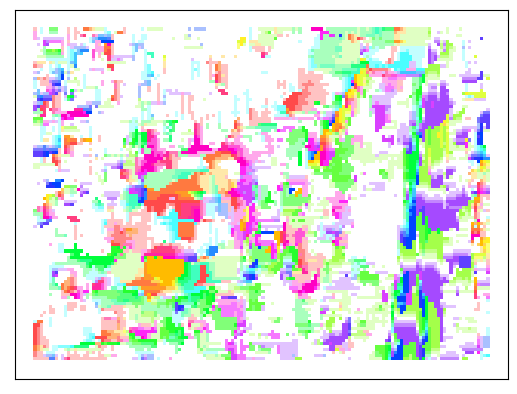

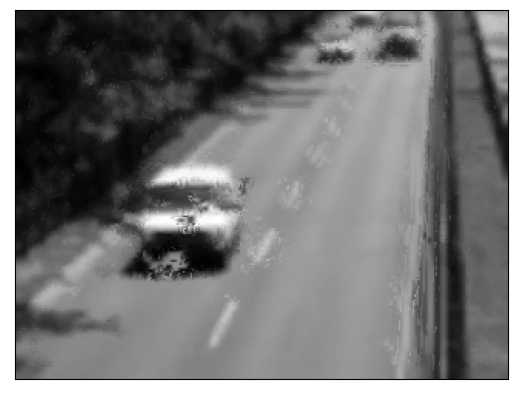

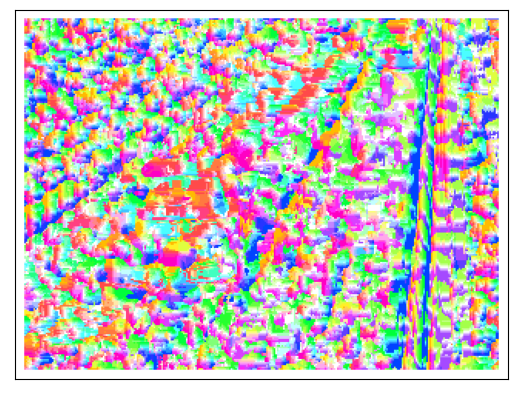

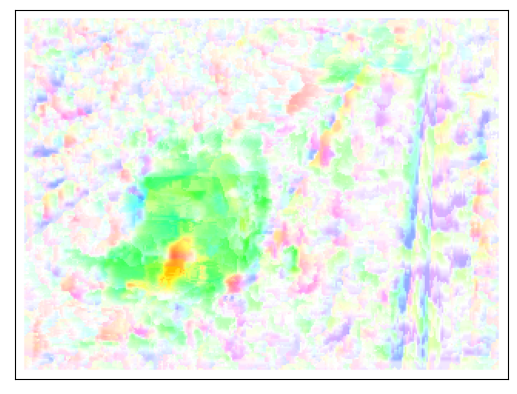

In [13]:
I = cv2.imread("I.jpg")
J = cv2.imread("J.jpg")
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
I = I_gray
J = J_gray
u,v = OF_wielo(I, J, W2=3, dY=3, dX=3, deep = 3)
img_rgb = u_v_to_angular_rgb(u,v)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

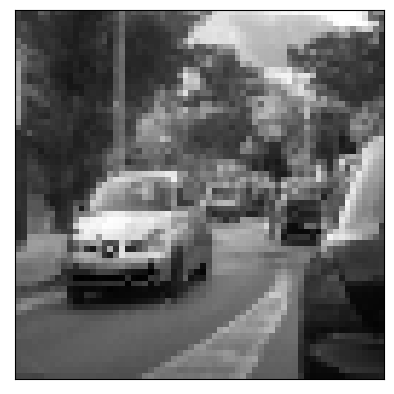

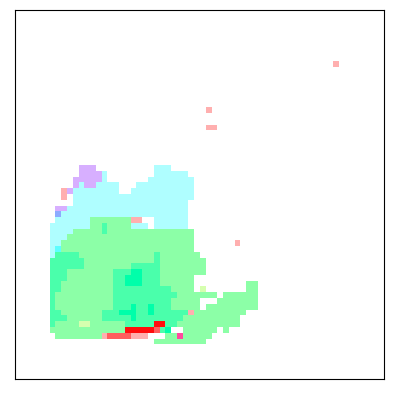

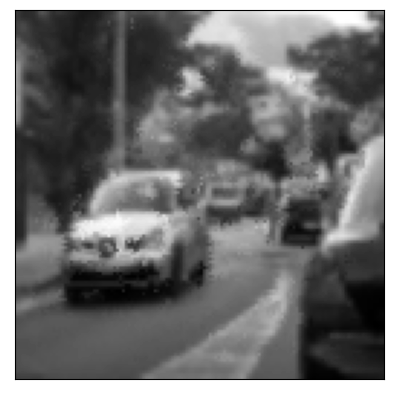

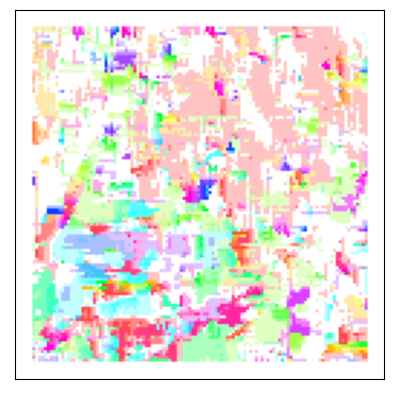

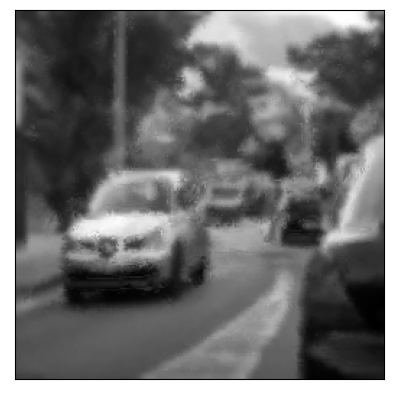

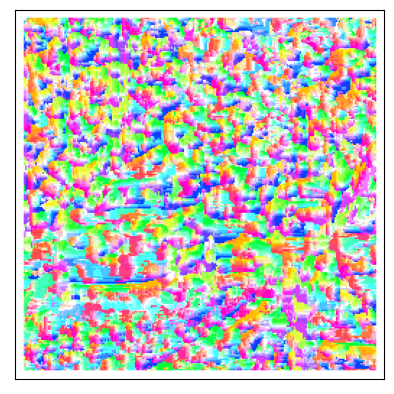

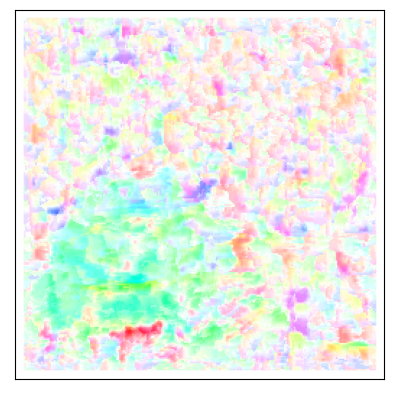

In [14]:
I = cv2.imread("cm1.png")
J = cv2.imread("cm2.png")
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
J_gray = cv2.cvtColor(J,cv2.COLOR_BGR2GRAY)
I = I_gray
J = J_gray
u,v = OF_wielo(I, J, W2=3, dY=3, dX=3, deep = 3)
img_rgb = u_v_to_angular_rgb(u,v)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()